In [0]:
%matplotlib inline


Training a Classifier
=====================

This is it. You have seen how to define neural networks, compute loss and make
updates to the weights of the network.

Now you might be thinking,

What about data?
----------------

Generally, when you have to deal with image, text, audio or video data,
you can use standard python packages that load data into a numpy array.
Then you can convert this array into a ``torch.*Tensor``.

-  For images, packages such as Pillow, OpenCV are useful
-  For audio, packages such as scipy and librosa
-  For text, either raw Python or Cython based loading, or NLTK and
   SpaCy are useful

Specifically for vision, we have created a package called
``torchvision``, that has data loaders for common datasets such as
Imagenet, CIFAR10, MNIST, etc. and data transformers for images, viz.,
``torchvision.datasets`` and ``torch.utils.data.DataLoader``.

This provides a huge convenience and avoids writing boilerplate code.

For this tutorial, we will use the CIFAR10 dataset.
It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’,
‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of
size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.

.. figure:: /_static/img/cifar10.png
   :alt: cifar10

   cifar10


Training an image classifier
----------------------------

We will do the following steps in order:

1. Load and normalizing the CIFAR10 training and test datasets using
   ``torchvision``
2. Define a Convolution Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data

1. Loading and normalizing CIFAR10
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Using ``torchvision``, it’s extremely easy to load CIFAR10.



### Importing Libraries

In [2]:
#connect google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls

drive  sample_data


In [0]:
import os
os.chdir('drive/My Drive/EVA4/assignment7')

In [5]:
!ls

 8_final.ipynb	     dataloader.ipynb   model_7.py    training_new.py
 augmentation.py     dataset.py         model.py      training.py
'Copy of S7.ipynb'   final.ipynb        __pycache__
 data		     __init__.py        S7.ipynb


In [6]:
!pwd

/content/drive/My Drive/EVA4/assignment7


In [0]:
import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim

import matplotlib.pyplot as plt
import numpy as np

from augmentation import Augmentation
from dataset import Data
from model import Net, BasicBlock, ResNet, ResNet18, ResNet34
from training import train, test

The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1].



### Downloading dataset

### Dataset and Creating Train/Test Split

In [8]:
Data = Data()
trainset = Data.getDataSet(train = True)
testset = Data.getDataSet(train = False)

Files already downloaded and verified
Files already downloaded and verified


### Dataloader Arguments & Test/Train Dataloaders

In [0]:
train_loader = Data.getDataLoader(trainset)
test_loader = Data.getDataLoader(testset)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Let us show some of the training images, for fun.



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


plane   dog  deer  deer


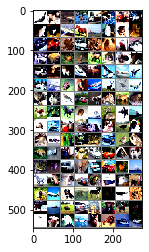

In [10]:
# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

2. Define a Convolution Neural Network
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Copy the neural network from the Neural Networks section before and modify it to
take 3-channel images (instead of 1-channel images as it was defined).



### Model Parameters

In [11]:
# dropout_value = 0.1

!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
# netobj = Net(dropout_value=0.1)
netobj = ResNet18()
model = netobj.to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
           Dropout-5           [-1, 64, 32, 32]               0
            Conv2d-6           [-1, 64, 32, 32]          36,864
       BatchNorm2d-7           [-1, 64, 32, 32]             128
        BasicBlock-8           [-1, 64, 32, 32]               0
            Conv2d-9           [-1, 64, 32, 32]          36,864
      BatchNorm2d-10           [-1, 64, 32, 32]             128
          Dropout-11           [-1, 64, 32, 32]               0
           Conv2d-12           [-1, 64, 32, 32]          36,864
      BatchNorm2d-13           [-1, 64, 32, 32]             128
       BasicBlock-14           [-1

### Training and Testing Loss

In [0]:
from training import train_losses, test_losses, train_acc, test_acc

In [13]:
# Dropout = 0.2
from torch.optim.lr_scheduler import StepLR


model =  netobj.to(device)
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.0001)
# scheduler = StepLR(optimizer, step_size=3, gamma=0.5)


EPOCHS = 150
for epoch in range(EPOCHS):
    # if epoch > 6:
    #   scheduler.step()
    for param_group in optimizer.param_groups:
      print("lr= ",param_group['lr'])
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer,  epoch)
    test(model, device, test_loader)
print('Finished Training')

  0%|          | 0/391 [00:00<?, ?it/s]

lr=  0.001
EPOCH: 0


Loss=1.38945734500885 Batch_id=390 Accuracy=36.10: 100%|██████████| 391/391 [03:14<00:00,  2.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0121, Accuracy: 4492/10000 (44.92%)

lr=  0.001
EPOCH: 1


Loss=1.3683644533157349 Batch_id=390 Accuracy=52.98: 100%|██████████| 391/391 [03:14<00:00,  2.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0099, Accuracy: 5643/10000 (56.43%)

lr=  0.001
EPOCH: 2


Loss=0.9715396761894226 Batch_id=390 Accuracy=61.44: 100%|██████████| 391/391 [03:14<00:00,  2.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0081, Accuracy: 6363/10000 (63.63%)

lr=  0.001
EPOCH: 3


Loss=0.9238306879997253 Batch_id=390 Accuracy=66.89: 100%|██████████| 391/391 [03:15<00:00,  2.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0068, Accuracy: 6872/10000 (68.72%)

lr=  0.001
EPOCH: 4


Loss=0.7251920700073242 Batch_id=390 Accuracy=70.72: 100%|██████████| 391/391 [03:18<00:00,  2.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0065, Accuracy: 7108/10000 (71.08%)

lr=  0.001
EPOCH: 5


Loss=0.6583478450775146 Batch_id=390 Accuracy=73.29: 100%|██████████| 391/391 [03:17<00:00,  2.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0056, Accuracy: 7467/10000 (74.67%)

lr=  0.001
EPOCH: 6


Loss=0.6623149514198303 Batch_id=390 Accuracy=76.06: 100%|██████████| 391/391 [03:16<00:00,  2.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 7594/10000 (75.94%)

lr=  0.001
EPOCH: 7


Loss=0.6148439049720764 Batch_id=390 Accuracy=78.34: 100%|██████████| 391/391 [03:16<00:00,  2.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 7863/10000 (78.63%)

lr=  0.001
EPOCH: 8


Loss=0.6131184697151184 Batch_id=390 Accuracy=79.98: 100%|██████████| 391/391 [03:14<00:00,  2.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 7708/10000 (77.08%)

lr=  0.001
EPOCH: 9


Loss=0.4793870449066162 Batch_id=390 Accuracy=81.46: 100%|██████████| 391/391 [03:15<00:00,  2.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 8097/10000 (80.97%)

lr=  0.001
EPOCH: 10


Loss=0.5642732977867126 Batch_id=390 Accuracy=82.62: 100%|██████████| 391/391 [03:14<00:00,  2.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 7954/10000 (79.54%)

lr=  0.001
EPOCH: 11


Loss=0.3612387776374817 Batch_id=390 Accuracy=83.72: 100%|██████████| 391/391 [03:14<00:00,  2.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 8267/10000 (82.67%)

lr=  0.001
EPOCH: 12


Loss=0.47900304198265076 Batch_id=390 Accuracy=84.83: 100%|██████████| 391/391 [03:17<00:00,  2.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8195/10000 (81.95%)

lr=  0.001
EPOCH: 13


Loss=0.3347383141517639 Batch_id=390 Accuracy=85.61: 100%|██████████| 391/391 [03:18<00:00,  2.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8268/10000 (82.68%)

lr=  0.001
EPOCH: 14


Loss=0.24627470970153809 Batch_id=390 Accuracy=86.76: 100%|██████████| 391/391 [03:18<00:00,  2.46it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8216/10000 (82.16%)

lr=  0.001
EPOCH: 15


Loss=0.3578574061393738 Batch_id=390 Accuracy=87.29: 100%|██████████| 391/391 [03:17<00:00,  2.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 8372/10000 (83.72%)

lr=  0.001
EPOCH: 16


Loss=0.2623690962791443 Batch_id=390 Accuracy=88.00: 100%|██████████| 391/391 [03:15<00:00,  2.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8404/10000 (84.04%)

lr=  0.001
EPOCH: 17


Loss=0.33591628074645996 Batch_id=390 Accuracy=88.52: 100%|██████████| 391/391 [03:14<00:00,  2.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 8378/10000 (83.78%)

lr=  0.001
EPOCH: 18


Loss=0.28435462713241577 Batch_id=390 Accuracy=89.49: 100%|██████████| 391/391 [03:14<00:00,  2.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8377/10000 (83.77%)

lr=  0.001
EPOCH: 19


Loss=0.3006454110145569 Batch_id=390 Accuracy=89.71: 100%|██████████| 391/391 [03:14<00:00,  2.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8519/10000 (85.19%)

lr=  0.001
EPOCH: 20


Loss=0.3151876628398895 Batch_id=390 Accuracy=90.34: 100%|██████████| 391/391 [03:15<00:00,  2.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8459/10000 (84.59%)

lr=  0.001
EPOCH: 21


Loss=0.22972705960273743 Batch_id=390 Accuracy=90.91: 100%|██████████| 391/391 [03:18<00:00,  2.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8528/10000 (85.28%)

lr=  0.001
EPOCH: 22


Loss=0.2846398651599884 Batch_id=390 Accuracy=91.38: 100%|██████████| 391/391 [03:18<00:00,  2.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8533/10000 (85.33%)

lr=  0.001
EPOCH: 23


Loss=0.30655190348625183 Batch_id=390 Accuracy=91.96: 100%|██████████| 391/391 [03:16<00:00,  2.57it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8517/10000 (85.17%)

lr=  0.001
EPOCH: 24


Loss=0.1836203783750534 Batch_id=390 Accuracy=92.28: 100%|██████████| 391/391 [03:15<00:00,  2.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8553/10000 (85.53%)

lr=  0.001
EPOCH: 25


Loss=0.09235204756259918 Batch_id=390 Accuracy=92.91: 100%|██████████| 391/391 [03:14<00:00,  2.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8526/10000 (85.26%)

lr=  0.001
EPOCH: 26


Loss=0.30905693769454956 Batch_id=390 Accuracy=93.06: 100%|██████████| 391/391 [03:13<00:00,  2.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8568/10000 (85.68%)

lr=  0.001
EPOCH: 27


Loss=0.19437088072299957 Batch_id=390 Accuracy=93.46: 100%|██████████| 391/391 [03:15<00:00,  2.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8630/10000 (86.30%)

lr=  0.001
EPOCH: 28


Loss=0.1371096819639206 Batch_id=390 Accuracy=94.13: 100%|██████████| 391/391 [03:19<00:00,  2.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8633/10000 (86.33%)

lr=  0.001
EPOCH: 29


Loss=0.15439748764038086 Batch_id=390 Accuracy=94.36: 100%|██████████| 391/391 [03:19<00:00,  2.46it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8623/10000 (86.23%)

lr=  0.001
EPOCH: 30


Loss=0.12962642312049866 Batch_id=390 Accuracy=94.56: 100%|██████████| 391/391 [03:17<00:00,  2.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8623/10000 (86.23%)

lr=  0.001
EPOCH: 31


Loss=0.1599341183900833 Batch_id=390 Accuracy=95.05: 100%|██████████| 391/391 [03:14<00:00,  2.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8661/10000 (86.61%)

lr=  0.001
EPOCH: 32


Loss=0.08182393014431 Batch_id=390 Accuracy=95.48: 100%|██████████| 391/391 [03:15<00:00,  2.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8676/10000 (86.76%)

lr=  0.001
EPOCH: 33


Loss=0.163604274392128 Batch_id=390 Accuracy=95.51: 100%|██████████| 391/391 [03:14<00:00,  2.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8640/10000 (86.40%)

lr=  0.001
EPOCH: 34


Loss=0.1087997704744339 Batch_id=390 Accuracy=95.90: 100%|██████████| 391/391 [03:19<00:00,  2.46it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8695/10000 (86.95%)

lr=  0.001
EPOCH: 35


Loss=0.27844586968421936 Batch_id=390 Accuracy=96.06: 100%|██████████| 391/391 [03:21<00:00,  2.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8683/10000 (86.83%)

lr=  0.001
EPOCH: 36


Loss=0.12486498057842255 Batch_id=390 Accuracy=96.46: 100%|██████████| 391/391 [03:20<00:00,  2.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8670/10000 (86.70%)

lr=  0.001
EPOCH: 37


Loss=0.14843301475048065 Batch_id=390 Accuracy=96.40: 100%|██████████| 391/391 [03:18<00:00,  2.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8606/10000 (86.06%)

lr=  0.001
EPOCH: 38


Loss=0.05948757380247116 Batch_id=390 Accuracy=96.74: 100%|██████████| 391/391 [03:15<00:00,  2.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8728/10000 (87.28%)

lr=  0.001
EPOCH: 39


Loss=0.14601098001003265 Batch_id=390 Accuracy=96.75: 100%|██████████| 391/391 [03:16<00:00,  2.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8684/10000 (86.84%)

lr=  0.001
EPOCH: 40


Loss=0.10267338901758194 Batch_id=390 Accuracy=97.20: 100%|██████████| 391/391 [03:15<00:00,  2.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8646/10000 (86.46%)

lr=  0.001
EPOCH: 41


Loss=0.05390879511833191 Batch_id=390 Accuracy=97.19: 100%|██████████| 391/391 [03:18<00:00,  2.46it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8730/10000 (87.30%)

lr=  0.001
EPOCH: 42


Loss=0.050198666751384735 Batch_id=390 Accuracy=97.38: 100%|██████████| 391/391 [03:23<00:00,  2.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8693/10000 (86.93%)

lr=  0.001
EPOCH: 43


Loss=0.14187276363372803 Batch_id=390 Accuracy=97.58: 100%|██████████| 391/391 [03:23<00:00,  2.41it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8737/10000 (87.37%)

lr=  0.001
EPOCH: 44


Loss=0.06742522865533829 Batch_id=390 Accuracy=97.64: 100%|██████████| 391/391 [03:20<00:00,  2.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8693/10000 (86.93%)

lr=  0.001
EPOCH: 45


Loss=0.04283802583813667 Batch_id=390 Accuracy=97.87: 100%|██████████| 391/391 [03:15<00:00,  2.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8651/10000 (86.51%)

lr=  0.001
EPOCH: 46


Loss=0.018683135509490967 Batch_id=390 Accuracy=97.75: 100%|██████████| 391/391 [03:16<00:00,  2.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8768/10000 (87.68%)

lr=  0.001
EPOCH: 47


Loss=0.06467752158641815 Batch_id=390 Accuracy=97.99: 100%|██████████| 391/391 [03:15<00:00,  2.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8703/10000 (87.03%)

lr=  0.001
EPOCH: 48


Loss=0.038294486701488495 Batch_id=390 Accuracy=98.20: 100%|██████████| 391/391 [03:19<00:00,  2.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8734/10000 (87.34%)

lr=  0.001
EPOCH: 49


Loss=0.06935688108205795 Batch_id=390 Accuracy=98.02: 100%|██████████| 391/391 [03:23<00:00,  2.41it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8701/10000 (87.01%)

lr=  0.001
EPOCH: 50


Loss=0.021208738908171654 Batch_id=390 Accuracy=98.23: 100%|██████████| 391/391 [03:21<00:00,  2.46it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 8764/10000 (87.64%)

lr=  0.001
EPOCH: 51


Loss=0.059570468962192535 Batch_id=390 Accuracy=98.20: 100%|██████████| 391/391 [03:20<00:00,  2.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8777/10000 (87.77%)

lr=  0.001
EPOCH: 52


Loss=0.11136598885059357 Batch_id=390 Accuracy=98.36: 100%|██████████| 391/391 [03:16<00:00,  2.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8775/10000 (87.75%)

lr=  0.001
EPOCH: 53


Loss=0.13013973832130432 Batch_id=390 Accuracy=98.54: 100%|██████████| 391/391 [03:16<00:00,  2.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 8792/10000 (87.92%)

lr=  0.001
EPOCH: 54


Loss=0.008410257287323475 Batch_id=390 Accuracy=98.54: 100%|██████████| 391/391 [03:16<00:00,  2.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8758/10000 (87.58%)

lr=  0.001
EPOCH: 55


Loss=0.019356150180101395 Batch_id=390 Accuracy=98.56: 100%|██████████| 391/391 [03:18<00:00,  2.46it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8750/10000 (87.50%)

lr=  0.001
EPOCH: 56


Loss=0.020375484600663185 Batch_id=390 Accuracy=98.63: 100%|██████████| 391/391 [03:22<00:00,  2.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8747/10000 (87.47%)

lr=  0.001
EPOCH: 57


Loss=0.04855557531118393 Batch_id=390 Accuracy=98.69: 100%|██████████| 391/391 [03:21<00:00,  2.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 8847/10000 (88.47%)

lr=  0.001
EPOCH: 58


Loss=0.01712799072265625 Batch_id=390 Accuracy=98.88: 100%|██████████| 391/391 [03:20<00:00,  2.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8774/10000 (87.74%)

lr=  0.001
EPOCH: 59


Loss=0.05429081246256828 Batch_id=390 Accuracy=98.88: 100%|██████████| 391/391 [03:15<00:00,  2.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8744/10000 (87.44%)

lr=  0.001
EPOCH: 60


Loss=0.06980063766241074 Batch_id=390 Accuracy=98.89: 100%|██████████| 391/391 [03:16<00:00,  2.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8759/10000 (87.59%)

lr=  0.001
EPOCH: 61


Loss=0.035055506974458694 Batch_id=390 Accuracy=98.88: 100%|██████████| 391/391 [03:19<00:00,  2.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8811/10000 (88.11%)

lr=  0.001
EPOCH: 62


Loss=0.06170586496591568 Batch_id=390 Accuracy=99.01: 100%|██████████| 391/391 [03:21<00:00,  2.43it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8787/10000 (87.87%)

lr=  0.001
EPOCH: 63


Loss=0.010923338122665882 Batch_id=390 Accuracy=98.98: 100%|██████████| 391/391 [03:22<00:00,  2.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8775/10000 (87.75%)

lr=  0.001
EPOCH: 64


Loss=0.026546180248260498 Batch_id=390 Accuracy=99.12: 100%|██████████| 391/391 [03:21<00:00,  2.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8768/10000 (87.68%)

lr=  0.001
EPOCH: 65


Loss=0.0572361946105957 Batch_id=390 Accuracy=99.07: 100%|██████████| 391/391 [03:15<00:00,  2.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 8779/10000 (87.79%)

lr=  0.001
EPOCH: 66


Loss=0.022574832662940025 Batch_id=390 Accuracy=99.06: 100%|██████████| 391/391 [03:16<00:00,  2.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8794/10000 (87.94%)

lr=  0.001
EPOCH: 67


Loss=0.012550020590424538 Batch_id=390 Accuracy=99.09: 100%|██████████| 391/391 [03:16<00:00,  2.46it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8817/10000 (88.17%)

lr=  0.001
EPOCH: 68


Loss=0.07774049043655396 Batch_id=390 Accuracy=99.13: 100%|██████████| 391/391 [03:16<00:00,  2.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 8804/10000 (88.04%)

lr=  0.001
EPOCH: 69


Loss=0.026986246928572655 Batch_id=390 Accuracy=99.11: 100%|██████████| 391/391 [03:18<00:00,  2.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8789/10000 (87.89%)

lr=  0.001
EPOCH: 70


Loss=0.073288694024086 Batch_id=390 Accuracy=99.23: 100%|██████████| 391/391 [03:21<00:00,  2.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8789/10000 (87.89%)

lr=  0.001
EPOCH: 71


Loss=0.024812400341033936 Batch_id=390 Accuracy=99.23: 100%|██████████| 391/391 [03:20<00:00,  2.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8801/10000 (88.01%)

lr=  0.001
EPOCH: 72


Loss=0.01029695849865675 Batch_id=390 Accuracy=99.27: 100%|██████████| 391/391 [03:19<00:00,  2.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8788/10000 (87.88%)

lr=  0.001
EPOCH: 73


Loss=0.01531075220555067 Batch_id=390 Accuracy=99.25: 100%|██████████| 391/391 [03:20<00:00,  2.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8839/10000 (88.39%)

lr=  0.001
EPOCH: 74


Loss=0.026914458721876144 Batch_id=390 Accuracy=99.22: 100%|██████████| 391/391 [03:20<00:00,  2.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8826/10000 (88.26%)

lr=  0.001
EPOCH: 75


Loss=0.027647340670228004 Batch_id=390 Accuracy=99.24: 100%|██████████| 391/391 [03:19<00:00,  2.46it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 8818/10000 (88.18%)

lr=  0.001
EPOCH: 76


Loss=0.03567442297935486 Batch_id=390 Accuracy=99.37: 100%|██████████| 391/391 [03:19<00:00,  2.46it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8823/10000 (88.23%)

lr=  0.001
EPOCH: 77


Loss=0.010736530646681786 Batch_id=390 Accuracy=99.28: 100%|██████████| 391/391 [03:20<00:00,  2.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 8818/10000 (88.18%)

lr=  0.001
EPOCH: 78


Loss=0.028607213869690895 Batch_id=390 Accuracy=99.35: 100%|██████████| 391/391 [03:20<00:00,  2.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 8796/10000 (87.96%)

lr=  0.001
EPOCH: 79


Loss=0.005456519313156605 Batch_id=390 Accuracy=99.28: 100%|██████████| 391/391 [03:20<00:00,  2.43it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8829/10000 (88.29%)

lr=  0.001
EPOCH: 80


Loss=0.1496879905462265 Batch_id=390 Accuracy=99.38: 100%|██████████| 391/391 [03:20<00:00,  2.46it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 8816/10000 (88.16%)

lr=  0.001
EPOCH: 81


Loss=0.007991194725036621 Batch_id=390 Accuracy=99.36: 100%|██████████| 391/391 [03:21<00:00,  2.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 8789/10000 (87.89%)

lr=  0.001
EPOCH: 82


Loss=0.022987687960267067 Batch_id=390 Accuracy=99.39: 100%|██████████| 391/391 [03:19<00:00,  2.42it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8827/10000 (88.27%)

lr=  0.001
EPOCH: 83


Loss=0.0036554515827447176 Batch_id=390 Accuracy=99.38: 100%|██████████| 391/391 [03:20<00:00,  2.41it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 8826/10000 (88.26%)

lr=  0.001
EPOCH: 84


Loss=0.027913808822631836 Batch_id=390 Accuracy=99.41: 100%|██████████| 391/391 [03:21<00:00,  2.46it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 8825/10000 (88.25%)

lr=  0.001
EPOCH: 85


Loss=0.033405303955078125 Batch_id=390 Accuracy=99.47: 100%|██████████| 391/391 [03:20<00:00,  2.43it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 8797/10000 (87.97%)

lr=  0.001
EPOCH: 86


Loss=0.01086760126054287 Batch_id=390 Accuracy=99.46: 100%|██████████| 391/391 [03:20<00:00,  2.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 8830/10000 (88.30%)

lr=  0.001
EPOCH: 87


Loss=0.02284623309969902 Batch_id=191 Accuracy=99.39:  49%|████▉     | 191/391 [01:38<01:43,  1.94it/s]

Buffered data was truncated after reaching the output size limit.

In [0]:
# with step learning rate
# Dropout = 0.2
from torch.optim.lr_scheduler import StepLR


model =  netobj.to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=0.0001)
scheduler = StepLR(optimizer, step_size=3, gamma=0.5)


EPOCHS = 50
for epoch in range(EPOCHS):
    if epoch > 6:
      scheduler.step()
    for param_group in optimizer.param_groups:
      print("lr= ",param_group['lr'])
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, scheduler,  epoch)
    test(model, device, test_loader)
print('Finished Training')

  0%|          | 0/391 [00:00<?, ?it/s]

lr=  0.01
EPOCH: 0


Loss=0.9834015965461731 Batch_id=390 Accuracy=49.20: 100%|██████████| 391/391 [00:29<00:00, 14.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0085, Accuracy: 6190/10000 (61.90%)

lr=  0.01
EPOCH: 1


Loss=0.7933235168457031 Batch_id=390 Accuracy=69.22: 100%|██████████| 391/391 [00:29<00:00, 14.25it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0067, Accuracy: 7141/10000 (71.41%)

lr=  0.01
EPOCH: 2


Loss=0.4670315384864807 Batch_id=390 Accuracy=77.46: 100%|██████████| 391/391 [00:29<00:00, 14.42it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 7772/10000 (77.72%)

lr=  0.01
EPOCH: 3


Loss=0.5056427121162415 Batch_id=390 Accuracy=82.30: 100%|██████████| 391/391 [00:29<00:00, 14.35it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 7941/10000 (79.41%)

lr=  0.01
EPOCH: 4


Loss=0.3649793565273285 Batch_id=390 Accuracy=85.64: 100%|██████████| 391/391 [00:29<00:00, 14.29it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 7998/10000 (79.98%)

lr=  0.01
EPOCH: 5


Loss=0.4300258755683899 Batch_id=390 Accuracy=88.26: 100%|██████████| 391/391 [00:29<00:00, 14.18it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 8007/10000 (80.07%)

lr=  0.01
EPOCH: 6


Loss=0.40797653794288635 Batch_id=390 Accuracy=90.25: 100%|██████████| 391/391 [00:29<00:00, 14.20it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 8073/10000 (80.73%)

lr=  0.01
EPOCH: 7


Loss=0.34517303109169006 Batch_id=390 Accuracy=92.40: 100%|██████████| 391/391 [00:29<00:00, 14.33it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 8191/10000 (81.91%)

lr=  0.01
EPOCH: 8


Loss=0.26737356185913086 Batch_id=390 Accuracy=93.58: 100%|██████████| 391/391 [00:29<00:00, 14.20it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 8151/10000 (81.51%)

lr=  0.005
EPOCH: 9


Loss=0.03250495716929436 Batch_id=390 Accuracy=97.52: 100%|██████████| 391/391 [00:29<00:00, 14.20it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 8559/10000 (85.59%)

lr=  0.005
EPOCH: 10


Loss=0.07949350774288177 Batch_id=390 Accuracy=98.85: 100%|██████████| 391/391 [00:29<00:00, 14.37it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8592/10000 (85.92%)

lr=  0.005
EPOCH: 11


Loss=0.0859895870089531 Batch_id=390 Accuracy=99.06: 100%|██████████| 391/391 [00:29<00:00, 14.37it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 8525/10000 (85.25%)

lr=  0.0025
EPOCH: 12


Loss=0.012799471616744995 Batch_id=390 Accuracy=99.54: 100%|██████████| 391/391 [00:29<00:00, 14.23it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8620/10000 (86.20%)

lr=  0.0025
EPOCH: 13


Loss=0.06203608959913254 Batch_id=390 Accuracy=99.68: 100%|██████████| 391/391 [00:29<00:00, 14.40it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8632/10000 (86.32%)

lr=  0.0025
EPOCH: 14


Loss=0.03281857818365097 Batch_id=390 Accuracy=99.74: 100%|██████████| 391/391 [00:29<00:00, 14.29it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 8615/10000 (86.15%)

lr=  0.00125
EPOCH: 15


Loss=0.011464965529739857 Batch_id=390 Accuracy=99.83: 100%|██████████| 391/391 [00:29<00:00, 14.33it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 8626/10000 (86.26%)

lr=  0.00125
EPOCH: 16


Loss=0.0031080543994903564 Batch_id=390 Accuracy=99.87: 100%|██████████| 391/391 [00:29<00:00, 14.31it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8645/10000 (86.45%)

lr=  0.00125
EPOCH: 17


Loss=0.0022569894790649414 Batch_id=390 Accuracy=99.85: 100%|██████████| 391/391 [00:29<00:00, 14.38it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8638/10000 (86.38%)

lr=  0.000625
EPOCH: 18


Loss=0.0026230693329125643 Batch_id=390 Accuracy=99.88: 100%|██████████| 391/391 [00:29<00:00, 14.32it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 8648/10000 (86.48%)

lr=  0.000625
EPOCH: 19


Loss=0.00267885928042233 Batch_id=390 Accuracy=99.92: 100%|██████████| 391/391 [00:29<00:00, 14.35it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8661/10000 (86.61%)

lr=  0.000625
EPOCH: 20


Loss=0.004561960697174072 Batch_id=390 Accuracy=99.93: 100%|██████████| 391/391 [00:29<00:00, 14.27it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8655/10000 (86.55%)

lr=  0.0003125
EPOCH: 21


Loss=0.028786713257431984 Batch_id=390 Accuracy=99.91: 100%|██████████| 391/391 [00:29<00:00, 14.20it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8653/10000 (86.53%)

lr=  0.0003125
EPOCH: 22


Loss=0.0021864413283765316 Batch_id=390 Accuracy=99.91: 100%|██████████| 391/391 [00:29<00:00, 13.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8668/10000 (86.68%)

lr=  0.0003125
EPOCH: 23


Loss=0.004073279909789562 Batch_id=390 Accuracy=99.92: 100%|██████████| 391/391 [00:29<00:00, 14.27it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8639/10000 (86.39%)

lr=  0.00015625
EPOCH: 24


Loss=0.009709501639008522 Batch_id=390 Accuracy=99.93: 100%|██████████| 391/391 [00:29<00:00, 14.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 8659/10000 (86.59%)

lr=  0.00015625
EPOCH: 25


Loss=0.03473743051290512 Batch_id=390 Accuracy=99.91: 100%|██████████| 391/391 [00:29<00:00, 14.26it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 8647/10000 (86.47%)

lr=  0.00015625
EPOCH: 26


Loss=0.007218366954475641 Batch_id=390 Accuracy=99.94: 100%|██████████| 391/391 [00:29<00:00, 14.23it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 8644/10000 (86.44%)

lr=  7.8125e-05
EPOCH: 27


Loss=0.008749795146286488 Batch_id=390 Accuracy=99.92: 100%|██████████| 391/391 [00:29<00:00, 14.16it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 8655/10000 (86.55%)

lr=  7.8125e-05
EPOCH: 28


Loss=0.018492233008146286 Batch_id=390 Accuracy=99.91: 100%|██████████| 391/391 [00:29<00:00, 14.27it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 8656/10000 (86.56%)

lr=  7.8125e-05
EPOCH: 29


Loss=0.0023880242370069027 Batch_id=390 Accuracy=99.94: 100%|██████████| 391/391 [00:29<00:00, 14.22it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8655/10000 (86.55%)

lr=  3.90625e-05
EPOCH: 30


Loss=0.002382940147072077 Batch_id=390 Accuracy=99.93: 100%|██████████| 391/391 [00:29<00:00, 14.25it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8649/10000 (86.49%)

lr=  3.90625e-05
EPOCH: 31


Loss=0.003938937094062567 Batch_id=390 Accuracy=99.93: 100%|██████████| 391/391 [00:29<00:00, 14.32it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8643/10000 (86.43%)

lr=  3.90625e-05
EPOCH: 32


Loss=0.0033559859730303288 Batch_id=390 Accuracy=99.94: 100%|██████████| 391/391 [00:29<00:00, 14.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8657/10000 (86.57%)

lr=  1.953125e-05
EPOCH: 33


Loss=0.004123985767364502 Batch_id=390 Accuracy=99.95: 100%|██████████| 391/391 [00:29<00:00, 14.20it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 8649/10000 (86.49%)

lr=  1.953125e-05
EPOCH: 34


Loss=0.005510741379112005 Batch_id=390 Accuracy=99.90: 100%|██████████| 391/391 [00:30<00:00, 14.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8654/10000 (86.54%)

lr=  1.953125e-05
EPOCH: 35


Loss=0.013881659135222435 Batch_id=390 Accuracy=99.94: 100%|██████████| 391/391 [00:29<00:00, 14.30it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 8656/10000 (86.56%)

lr=  9.765625e-06
EPOCH: 36


Loss=0.0032389641273766756 Batch_id=390 Accuracy=99.92: 100%|██████████| 391/391 [00:29<00:00, 14.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8640/10000 (86.40%)

lr=  9.765625e-06
EPOCH: 37


Loss=0.013200372457504272 Batch_id=390 Accuracy=99.93: 100%|██████████| 391/391 [00:30<00:00, 14.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 8649/10000 (86.49%)

lr=  9.765625e-06
EPOCH: 38


Loss=0.0012153387069702148 Batch_id=390 Accuracy=99.93: 100%|██████████| 391/391 [00:30<00:00, 14.23it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 8653/10000 (86.53%)

lr=  4.8828125e-06
EPOCH: 39


Loss=0.003599876072257757 Batch_id=390 Accuracy=99.95: 100%|██████████| 391/391 [00:30<00:00, 13.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 8657/10000 (86.57%)

lr=  4.8828125e-06
EPOCH: 40


Loss=0.0033363341353833675 Batch_id=390 Accuracy=99.93: 100%|██████████| 391/391 [00:30<00:00, 14.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 8661/10000 (86.61%)

lr=  4.8828125e-06
EPOCH: 41


Loss=0.004623836372047663 Batch_id=390 Accuracy=99.92: 100%|██████████| 391/391 [00:30<00:00, 14.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8630/10000 (86.30%)

lr=  2.44140625e-06
EPOCH: 42


Loss=0.003362941788509488 Batch_id=390 Accuracy=99.93: 100%|██████████| 391/391 [00:29<00:00, 14.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 8656/10000 (86.56%)

lr=  2.44140625e-06
EPOCH: 43


Loss=0.006716609001159668 Batch_id=390 Accuracy=99.93: 100%|██████████| 391/391 [00:30<00:00, 13.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8656/10000 (86.56%)

lr=  2.44140625e-06
EPOCH: 44


Loss=0.002625972032546997 Batch_id=390 Accuracy=99.93: 100%|██████████| 391/391 [00:29<00:00, 14.15it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 8652/10000 (86.52%)

lr=  1.220703125e-06
EPOCH: 45


Loss=0.005081099458038807 Batch_id=390 Accuracy=99.95: 100%|██████████| 391/391 [00:30<00:00, 14.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8659/10000 (86.59%)

lr=  1.220703125e-06
EPOCH: 46


Loss=0.010949397459626198 Batch_id=390 Accuracy=99.94: 100%|██████████| 391/391 [00:30<00:00, 13.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8650/10000 (86.50%)

lr=  1.220703125e-06
EPOCH: 47


Loss=0.008251791819930077 Batch_id=390 Accuracy=99.92: 100%|██████████| 391/391 [00:30<00:00, 14.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 8661/10000 (86.61%)

lr=  6.103515625e-07
EPOCH: 48


Loss=0.009236985817551613 Batch_id=390 Accuracy=99.93: 100%|██████████| 391/391 [00:30<00:00, 13.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8656/10000 (86.56%)

lr=  6.103515625e-07
EPOCH: 49


Loss=0.022146891802549362 Batch_id=390 Accuracy=99.93: 100%|██████████| 391/391 [00:30<00:00, 13.97it/s]



Test set: Average loss: 0.0047, Accuracy: 8646/10000 (86.46%)

Finished Training


Text(0, 0.5, 'Accuracy')

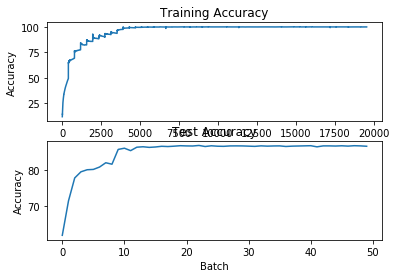

In [0]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2)
axs[0].plot(train_acc)
axs[0].set_title("Training Accuracy")
axs[0].set_xlabel("Batch")
axs[0].set_ylabel("Accuracy")
axs[1].plot(test_acc)
axs[1].set_title("Test Accuracy")
axs[1].set_xlabel("Batch")
axs[1].set_ylabel("Accuracy")

4. Train the network
^^^^^^^^^^^^^^^^^^^^

This is when things start to get interesting.
We simply have to loop over our data iterator, and feed the inputs to the
network and optimize.



5. Test the network on the test data
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

We have trained the network for 2 passes over the training dataset.
But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network
outputs, and checking it against the ground-truth. If the prediction is
correct, we add the sample to the list of correct predictions.

Okay, first step. Let us display an image from the test set to get familiar.



GroundTruth:   frog  frog   dog plane


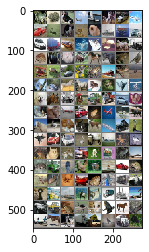

In [0]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

Okay, now let us see what the neural network thinks these examples above are:



In [0]:
outputs = model(images.cuda())

The outputs are energies for the 10 classes.
Higher the energy for a class, the more the network
thinks that the image is of the particular class.
So, let's get the index of the highest energy:



In [0]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:   frog  frog   dog plane


The results seem pretty good.

Let us look at how the network performs on the whole dataset.



In [0]:
correct = 0
total = 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images.cuda())
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.cuda()).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 86 %


That looks waaay better than chance, which is 10% accuracy (randomly picking
a class out of 10 classes).
Seems like the network learnt something.

Hmmm, what are the classes that performed well, and the classes that did
not perform well:



In [0]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images = images.cuda()
        labels = labels.cuda()
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 86 %
Accuracy of   car : 91 %
Accuracy of  bird : 76 %
Accuracy of   cat : 80 %
Accuracy of  deer : 81 %
Accuracy of   dog : 79 %
Accuracy of  frog : 96 %
Accuracy of horse : 83 %
Accuracy of  ship : 91 %
Accuracy of truck : 87 %
